<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial2.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/student/W2D3_Tutorial2.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 2: What is an Extreme Event? Empirical Return Levels

**Week 2, Day 3, Extremes & Variability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Younkap Nina Duplex, Sloane Garelick, Paul Heubel, Zahra Khodakaramimaghsoud, Peter Ohue, Laura Paccini, Jenna Pearson, Agustina Pesce, Derick Temfack, Peizhen Yang, Cheng Zhang, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 30 minutes

In this second tutorial, you will calculate the precipitation levels associated with the 50, 100, and 500-year events using the empirical method.

By the end of this tutorial, you will have the ability to:

- Calculate empirical return levels.
- Visualize a data record using a return level plot.
- Estimate the uncertainty qualitatively via bootstrapping.

# Setup

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pooch
import tempfile
from scipy import stats

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D3_T2"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [4]:
# @title Helper functions


def pooch_load(filelocation=None, filename=None, processor=None):
    shared_location = "/home/jovyan/shared/Data/tutorials/W2D3_ExtremesandVariability"  # this is different for each day
    user_temp_cache = tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location, filename)):
        file = os.path.join(shared_location, filename)
    else:
        file = pooch.retrieve(
            filelocation,
            known_hash=None,
            fname=os.path.join(user_temp_cache, filename),
            processor=processor,
        )

    return file

In [5]:
# @title Video 1: What is an Extreme Event?

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'REkhPO9cZHs'), ('Bilibili', 'BV18V411N7Hk')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_What_is_an_extreme_event_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "zx29a"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/zx29a/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_What_is_an_extreme_event_Slides")

# Section 1: Calculating Return Levels

The 100-year event represents a precipitation level that is expected to occur only once every 100 years, indicating an event with a 1% chance of occurring in any given year. Similarly, the 2-year event has a 50% chance of occurring annually. These return periods, as they are commonly referred to, play a crucial role in policymaking and infrastructure design. For instance, bridges are constructed to withstand 100-year flood events, evacuation plans are tailored for 50-year earthquakes, and nuclear power plants are engineered to withstand 10,000-year storms.

To determine the return levels associated with a specific return period, there are two approaches: empirical calculation and the use of probability density functions (PDF) within a distribution. In this tutorial, we will first focus on the empirical method.

First download and open the precipitation record in Germany (from the last tutorial) and plot it over time:

In [9]:
# download file: 'precipitationGermany_1920-2022.csv'
filename_precipitationGermany = "precipitationGermany_1920-2022.csv"
url_precipitationGermany = "https://osf.io/xs7h6/download"
data = pd.read_csv(
    pooch_load(url_precipitationGermany, filename_precipitationGermany), index_col=0
).set_index("years")
data.columns = ["precipitation"]
precipitation = data.precipitation

SHA256 hash of downloaded file: ef9f29e709a1db0745c28bcb9460dac22f6c9624de41d9e2187ab547e9aaa3c8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


<Axes: xlabel='Time (years)', ylabel='Annual Maximum Daily Precipitation \n(mm/day)'>

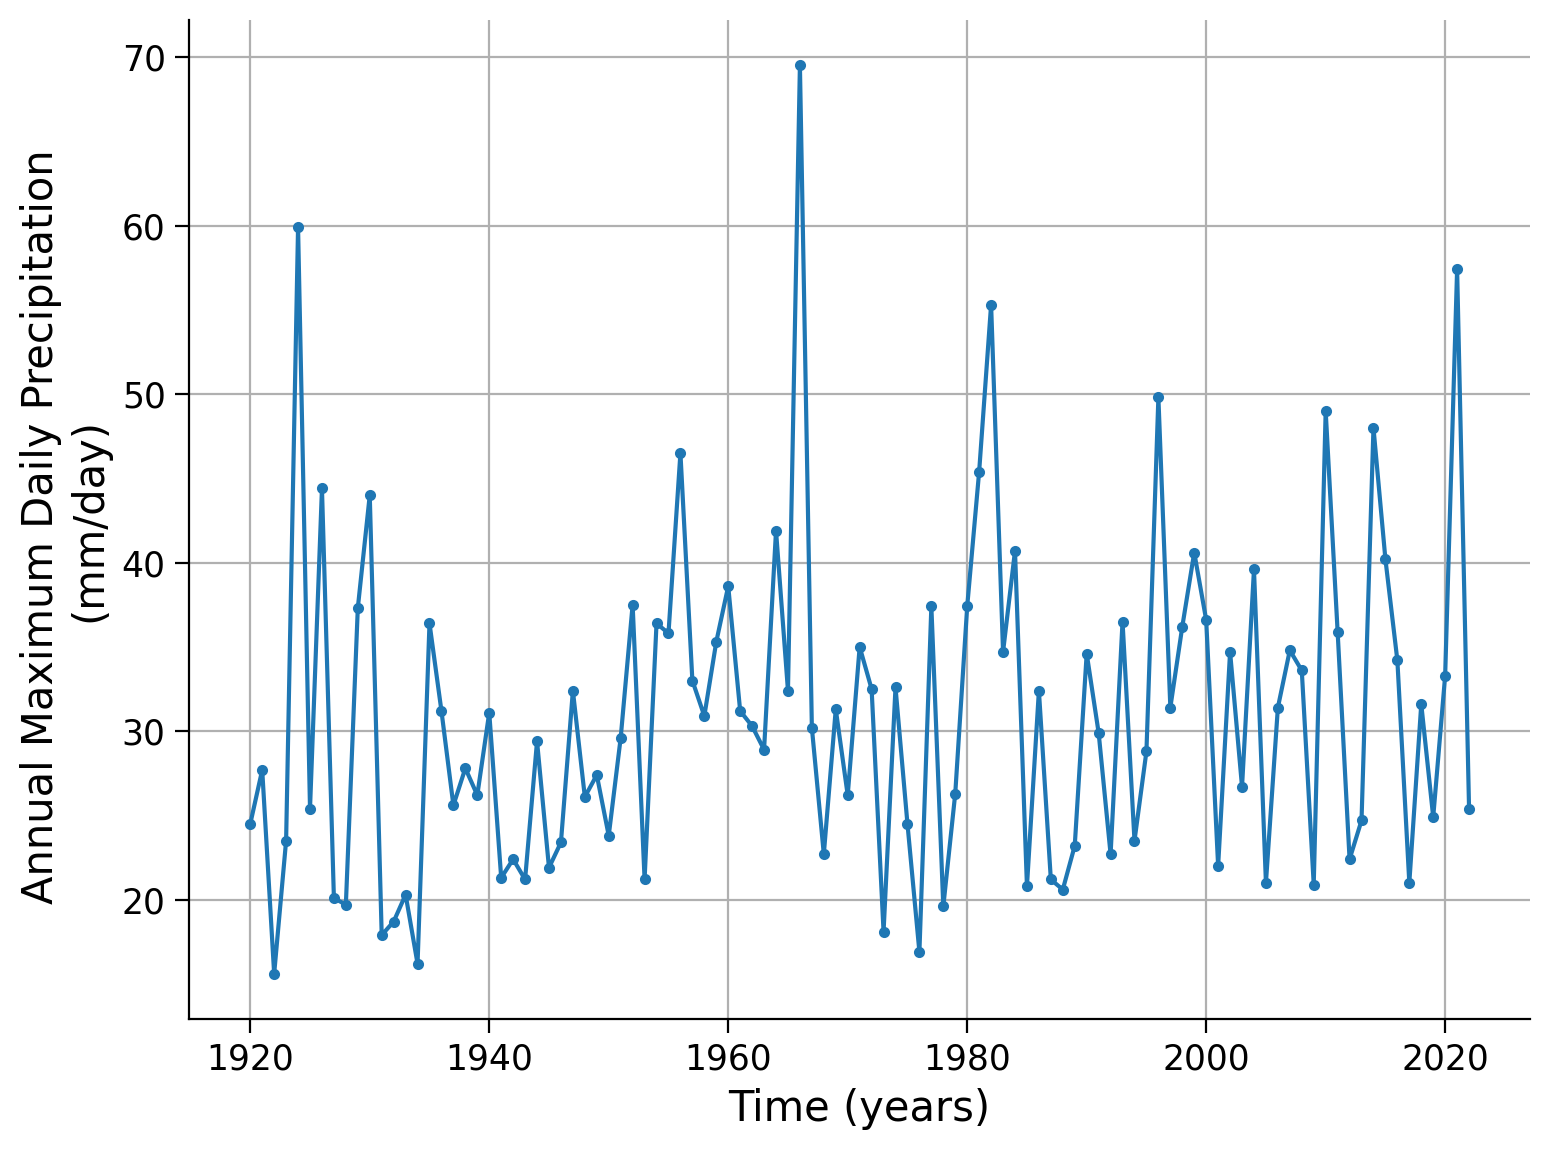

In [10]:
precipitation.plot.line(
    style=".-", xlabel="Time (years)", ylabel="Annual Maximum Daily Precipitation \n(mm/day)",grid=True
)

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A time series of the annual maximum daily precipitation in millimeters per day per year. The data ranges from approximately 16 mm/day in the 1920s to almost 70 mm/day around 1970. About four peaks show unusual events of extreme precipitation (in 1924, 1968, 1982, and 2021). Moreover, a positive trend over time seems to be visible.
</details>

In this tutorial, we will calculate the return period for each event in the dataset, specifically for each maximum precipitation value recorded in a given year. To accomplish this, we will begin by ranking the precipitation levels in descending order using the sort function. The sorted data will be saved in the first column of a matrix named "precip" with four columns, and the number of rows will correspond to the number of data entries.

In the second column of the matrix, we will store the ranks assigned to each precipitation value, with the highest value assigned a rank of 1 and the lowest value assigned a rank corresponding to the total number of entries (e.g., 103).

In [11]:
# create a data frame from precipitation data
precip_df = pd.DataFrame(index=np.arange(data.precipitation.size))

In [12]:
# sort the data
precip_df["sorted"] = np.sort(data.precipitation)[::-1]

In [13]:
# assign the ranks
precip_df["ranks"] = np.arange(data.precipitation.size)

In [14]:
# len() gives the length of the list
len(precip_df)

103

In [15]:
# the command np.unique gives back only unique values, and len() gives the length.
# Thus len(np.unique()) shows how many unique values can be found in the data in question.
len(np.unique(precip_df["sorted"]))

87


Since we have 103 precipitation values but only 87 unique ones, we have a few instances where values are duplicated. It is important to ensure that these duplicate values are assigned the same rank. To address this, we can utilize the `rankdata` function from the `scipy` library. This function assigns similar values the same rank. After obtaining the ranks, we need to sort them before incorporating them into our matrix.


In [16]:
# rank via scipy instead to deal with duplicate values
precip_df["ranks_sp"] = np.sort(stats.rankdata(-data.precipitation))

In [17]:
# the command set gives back only unique values.
len(np.unique(precip_df["ranks_sp"]))

87

Now, the length of ranks is the same as the length of unique values.
Next we compute the empirical probability of exceedance by dividing the rank (r) by the total
amount of values (n) plus 1.


In [18]:
# find exceedance probability
n = data.precipitation.size
precip_df["exceedance"] = precip_df["ranks_sp"] / (n + 1)

The return period and the chance of exceedance are related through T = 1/P

In [19]:
# find return period
precip_df["period"] = 1 / precip_df["exceedance"]

In [20]:
precip_df

,sorted,ranks,ranks_sp,exceedance,period
0,69.5,0,1.0,0.009615,104.000000
1,59.9,1,2.0,0.019231,52.000000
2,57.4,2,3.0,0.028846,34.666667
3,55.3,3,4.0,0.038462,26.000000
4,49.8,4,5.0,0.048077,20.800000
...,...,...,...,...,...
98,18.1,98,99.0,0.951923,1.050505
99,17.9,99,100.0,0.961538,1.040000
100,16.9,100,101.0,0.971154,1.029703
101,16.2,101,102.0,0.980769,1.019608


Now that we know the return periods of each annual maximum precipitation level we can create
a return level plot - a plot of return levels against return periods:

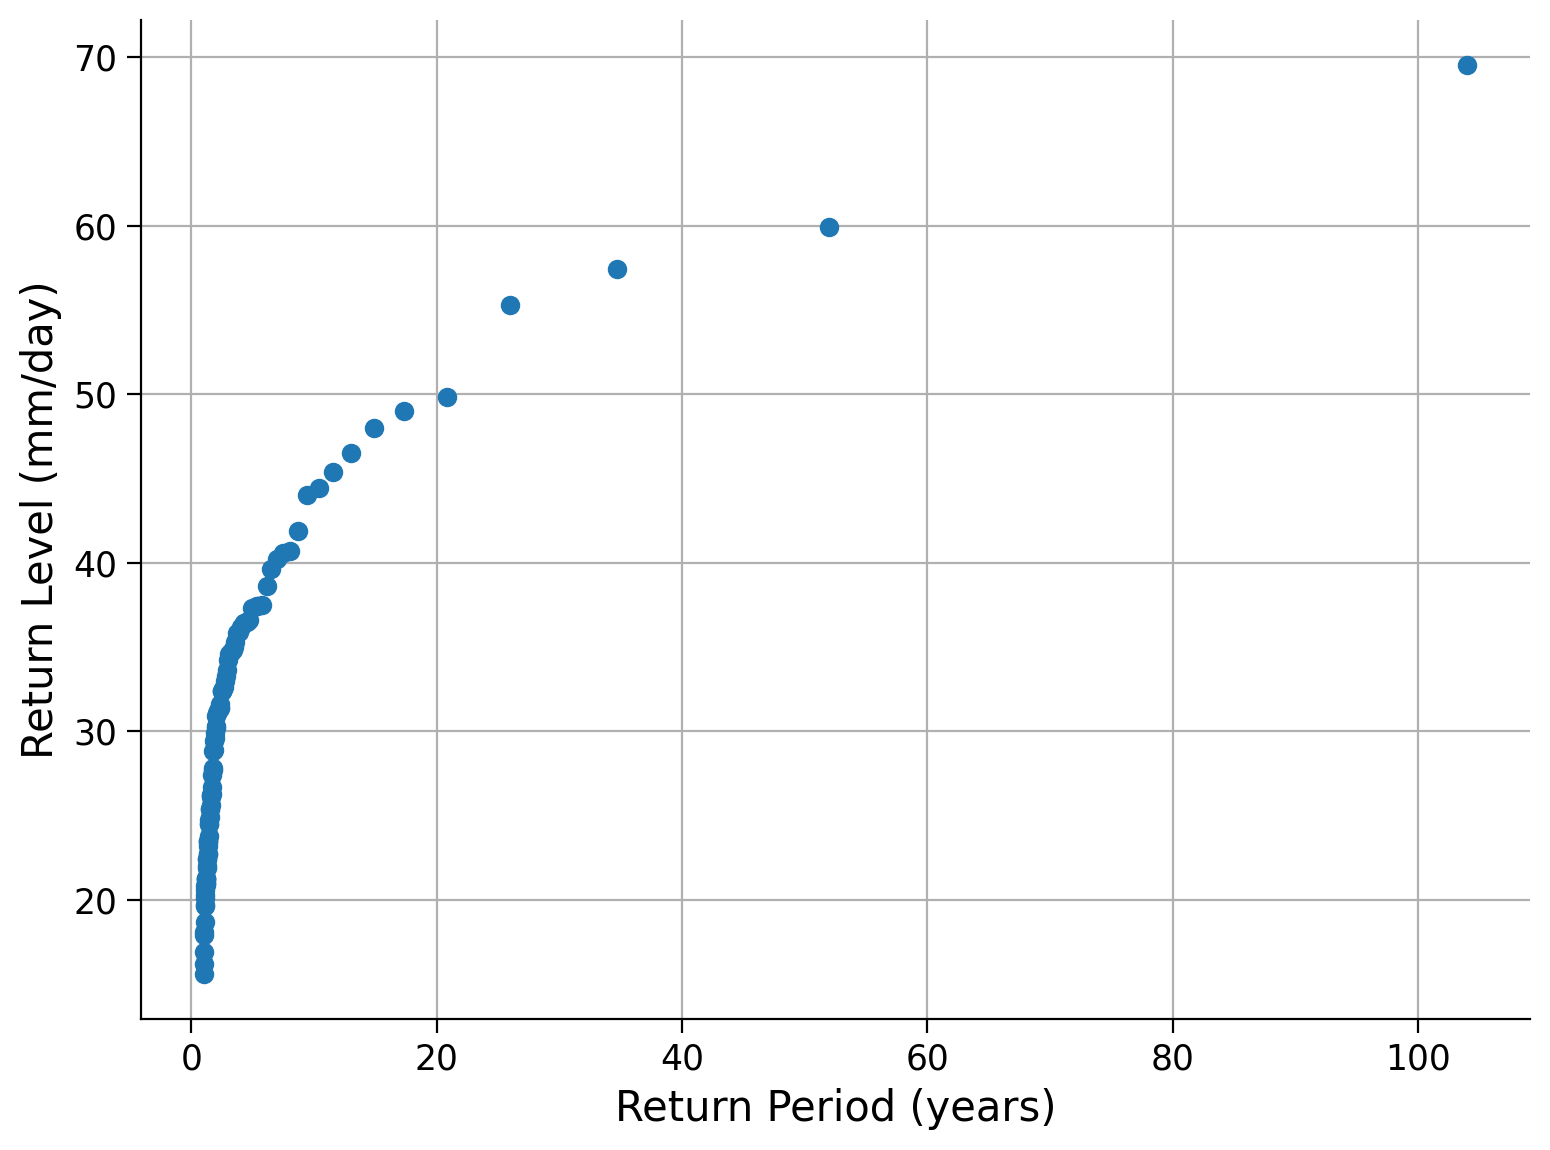

In [21]:
# plot the results
fig, ax = plt.subplots()
ax.plot(precip_df["period"], precip_df["sorted"], "o")
ax.grid(True)
ax.set_xlabel("Return Period (years)")
ax.set_ylabel("Return Level (mm/day)")
ax.set_xscale("linear")  # notice the xscale

<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A return level plot of the annual maximum precipitation data in millimeters per day versus the return period in years. The smaller the return period, the more data points we have, as these events are more likely. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset.
</details>

Frequently, we discuss return periods using a logarithmic scale, referring to events with return periods of 1 year, 10 years, and 100 years. Let's modify the plot above by changing the x-axis to a logarithmic scale.

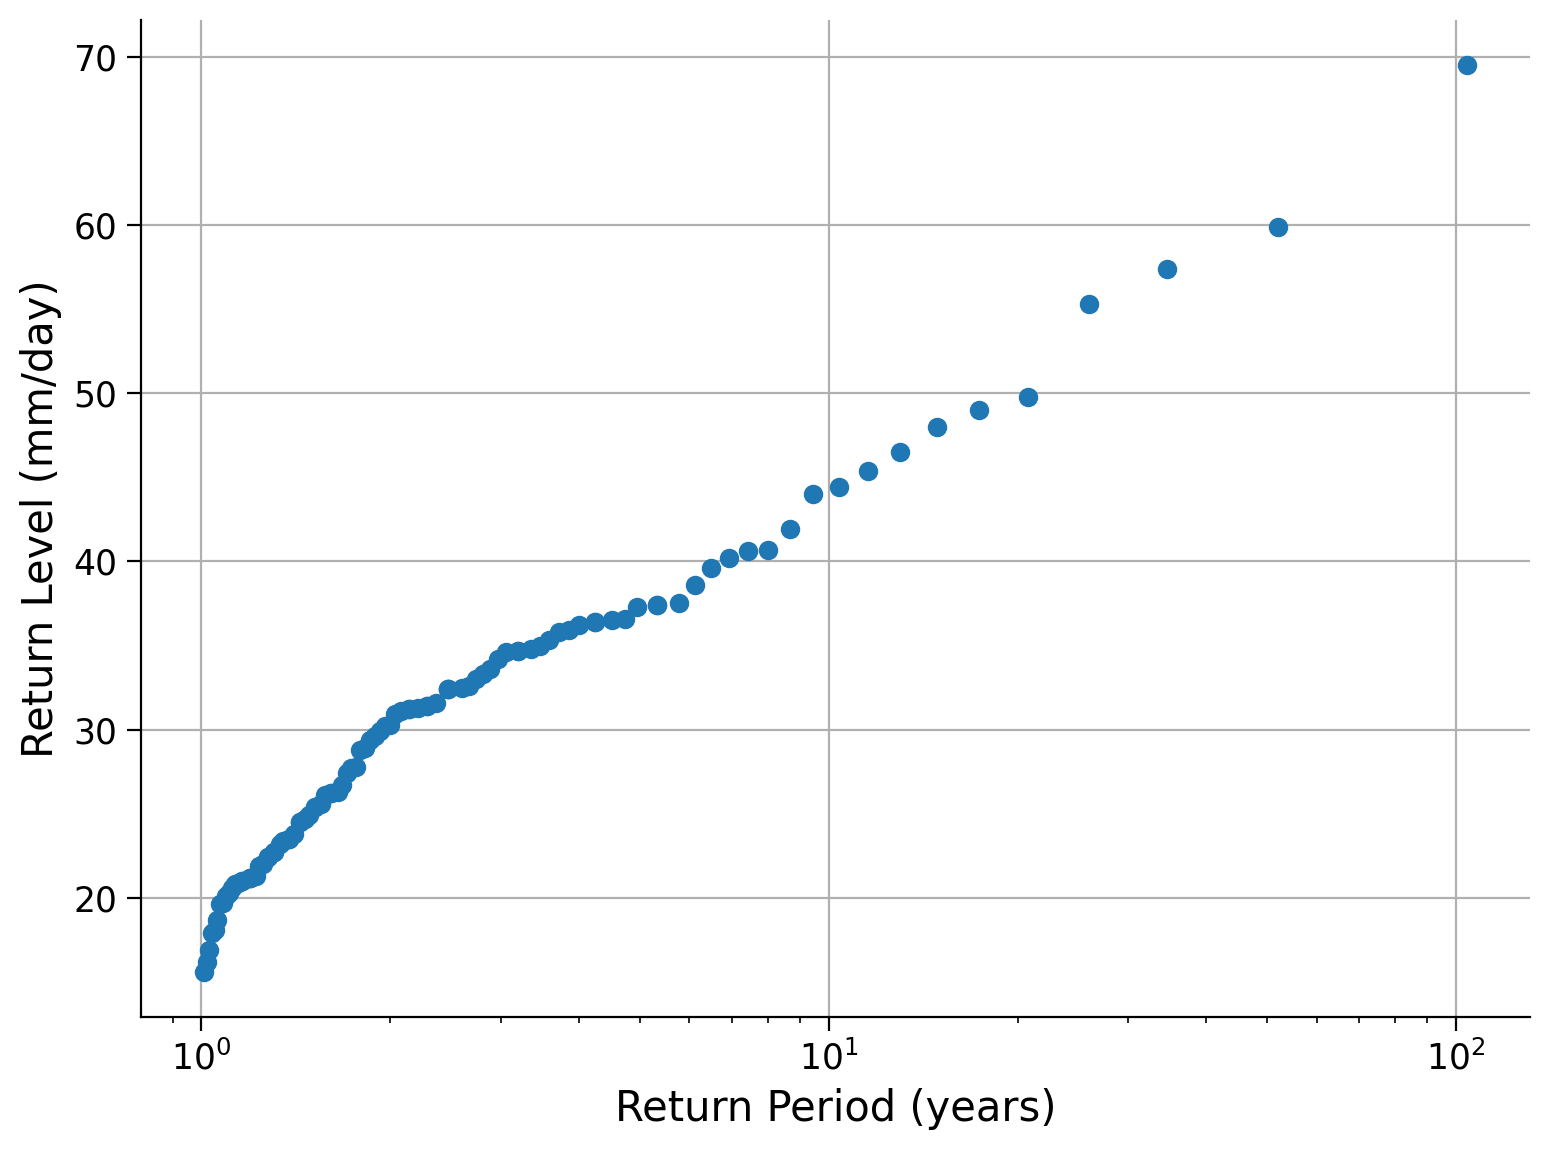

In [22]:
fig, ax = plt.subplots()
ax.plot(precip_df["period"], precip_df["sorted"], "o")
ax.grid(True)
ax.set_xlabel("Return Period (years)")
ax.set_ylabel("Return Level (mm/day)")
ax.set_xscale("log")  # change the xscale

## Questions 1:

1. From the figure, what is the return level associated with the 1, 10, and 100 year return periods.

2. It is important to note that the plots we have just made represent a single data record, which means our estimate of "extreme values" relies on a limited number of data points. Considering this, how confident can we be about the return periods or levels of extreme values based on this plot?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial2_Solution_99c3b035.py)



In [23]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1")

## Coding Exercise 1:

We would like to have as much data as possible, because then we can sample more of what is possible, and be more sure we have not missed anything important. However, often we are limited by the available data, which is less than we would like.

Fortunately, there is a trick that allows us to use the data itself to tell us about its own uncertainty. This method is called "bootstrapping", in reference to the saying of "pulling oneself up by one's bootstraps".

This method works by assuming that while we have limited data, the data that we do have is nevertheless a representative sample of possible events - that is we assume that we did not miss anything systematic. Then, we use the data as a distribution to draw "fake" observations from, and compute uncertainties using those:

1. We pull artificial observations from our data - with replacement.
2. We draw as many observations as our data record is long. This record will now only include data points that we observed before, but some will show up several times, some not at all.
3. We compute our statistics over this artifical record - just as we did to the record itself.
4. We repeat this process many times.
5. Thus we compute our statistics over many artificial records, which can give us an indication of the uncertainty.

Remember, this only works under the assumption that our data is representative of the process - that we did not systematically miss something about the data. We cannot use this to estimate how hot it could get during noon if we only recorded the temperature at night.

In this exercise, you may now:
1. Define a function to calculate the empirical return period, then take 1000 resamples with replacement (each value could be sampled more than once) and plot the associated return level curves for each sample, together with the return period of the original data set.

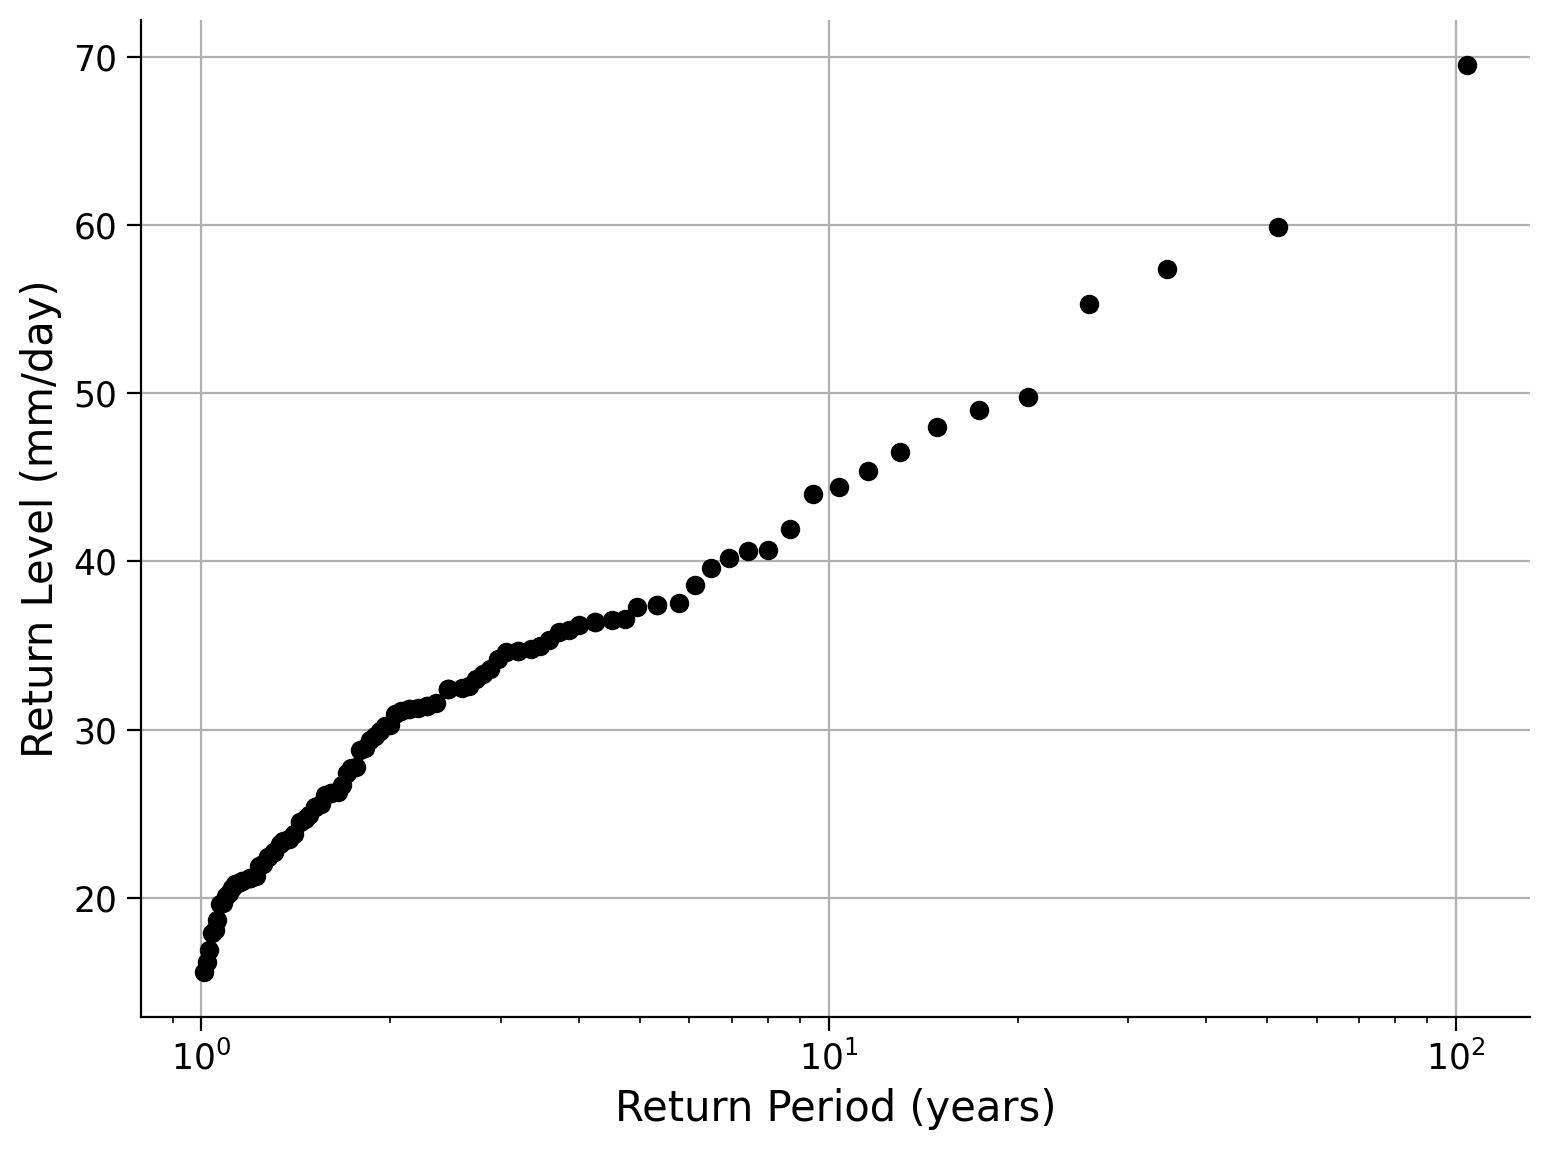

In [24]:
# define a function to calculate the empirical return period by using the code from the cells above.
# add period and sorted to a dataframe as before
def empirical_period(data):
    ...

    return df[["period", "sorted"]].set_index("period")["sorted"]


# setup figure
fix, ax = plt.subplots()

# create 1000 resamples of the data, with replacement set to true.
for i in range(1000):
    ...

# aesthetics
ax.plot(precip_df["period"], precip_df["sorted"], "ko")
ax.grid(True)
ax.set_xlabel("Return Period (years)")
ax.set_ylabel("Return Level (mm/day)")
ax.set_xscale("log")

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D3_ExtremesandVariability/solutions/W2D3_Tutorial2_Solution_8befc379.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D3_ExtremesandVariability/static/W2D3_Tutorial2_Solution_8befc379_0.png>



<details>
<summary> <font color='orangered'>Click here for a description of the plot  </font></summary>
A return level plot of the annual maximum precipitation data in millimeters per day versus the return period in years. Additionally, the bootstrapped resamples are shown as associated return level curves. The smaller the return period, the more data points we have, and the narrower the uncertainty band. This is because these events are more likely and more often sampled in our original data. In contrast, events of a 10-year to a 100-year return period are rare in our 103-year-long dataset and corresponding return level curves show a larger spread. Hence, the uncertainty of return level increases for larger return periods, or in other words, for less likely events.
</details>

In [25]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1")

# Summary
In this tutorial, you have explored how to calculate empirical return periods and visualized these using a return level plot. You also considered the limitations of estimating extreme values based on a single data record by applying a bootstrapping approach.

# Resources

Data from this tutorial uses the 0.25 degree precipitation dataset E-OBS. It combines precipitation observations to generate a gridded (i.e. no "holes") precipitation over Europe. We used the precipitation data from the gridpoint at 51 N, 6 E.

The dataset can be accessed using the KNMI Climate Explorer [here](https://climexp.knmi.nl/select.cgi?id=someone@somewhere&field=ensembles_025_rr). The Climate Explorer is a great resource to access, manipulate and visualize climate data, including observations and climate model simulations. It is freely accessible - feel free to explore!